In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import norm, t, kstest, shapiro
from statsmodels.stats import proportion
from matplotlib import pyplot as plt
from scipy.stats import ttest_1samp


import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/ab_stats.csv')
data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


revenue  num_purchases  purchase ab_group  av_site visit
0      0.0              0         0        A       9.040174
1      0.0              0         0        A       4.811628
2      0.0              0         0        A       7.342623
3      0.0              0         0        A       7.744581
4      0.0              0         0        A      10.511814
5      0.0              0         0        A       9.578727
6      0.0              0         0        A       6.162601
7      0.0              0         0        A      11.909452
8      0.0              0         0        A       6.540910
9      0.0              0         0        A       7.990794

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [ ]:
data.describe()

revenue  num_purchases      purchase  av_site visit
count  23652.000000   23652.000000  23652.000000   23652.000000
mean       0.324689       0.043590      0.020717       7.013112
std        9.557730       1.079403      0.142438       3.154584
min        0.000000       0.000000      0.000000     -12.073486
25%        0.000000       0.000000      0.000000       5.173787
50%        0.000000       0.000000      0.000000       7.007936
75%        0.000000       0.000000      0.000000       8.864119
max     1303.609284     152.000000      1.000000      22.446822

In [ ]:
data.ab_group.value_counts()

A    11835
B    11817
Name: ab_group, dtype: int64

Размеры групп практически не отличаются


In [ ]:
data[data['ab_group']=='A'].describe()

revenue  num_purchases      purchase  av_site visit
count  11835.000000   11835.000000  11835.000000   11835.000000
mean       0.404462       0.050697      0.021631       6.974724
std       13.133218       1.467511      0.145481       2.023533
min        0.000000       0.000000      0.000000     -12.073486
25%        0.000000       0.000000      0.000000       5.656155
50%        0.000000       0.000000      0.000000       6.982329
75%        0.000000       0.000000      0.000000       8.345572
max     1303.609284     152.000000      1.000000      17.728836

In [ ]:
data[data['ab_group']=='B'].describe()

revenue  num_purchases      purchase  av_site visit
count  11817.000000   11817.000000  11817.000000   11817.000000
mean       0.244794       0.036473      0.019802       7.051559
std        3.176534       0.418480      0.139325       3.976799
min        0.000000       0.000000      0.000000      -8.286822
25%        0.000000       0.000000      0.000000       4.380984
50%        0.000000       0.000000      0.000000       7.060873
75%        0.000000       0.000000      0.000000       9.768648
max      113.830000      25.000000      1.000000      22.446822

In [ ]:
data[data['av_site visit']<0].ab_group.value_counts()

B    462
A      6
Name: ab_group, dtype: int64

Как видим, в столбце 'av_site visit' есть отрицательные значения в обеих группах, чего не может быть.

Т. к. отрицательных значений меньше 5% от всех, удалим их.

In [ ]:
data = data[data['av_site visit']>=0]

In [ ]:
data.describe()

revenue  num_purchases      purchase  av_site visit
count  23184.000000   23184.000000  23184.000000   23184.000000
mean       0.326511       0.043780      0.020704       7.188254
std        9.645839       1.089462      0.142394       2.924011
min        0.000000       0.000000      0.000000       0.008679
25%        0.000000       0.000000      0.000000       5.314379
50%        0.000000       0.000000      0.000000       7.068656
75%        0.000000       0.000000      0.000000       8.910900
max     1303.609284     152.000000      1.000000      22.446822

Посмотрим данные по группам

In [ ]:
data[data['ab_group']=='A'].describe()

revenue  num_purchases      purchase  av_site visit
count  11829.000000   11829.000000  11829.000000   11829.000000
mean       0.404667       0.050723      0.021642       6.980379
std       13.136545       1.467883      0.145517       2.004450
min        0.000000       0.000000      0.000000       0.145466
25%        0.000000       0.000000      0.000000       5.657590
50%        0.000000       0.000000      0.000000       6.984166
75%        0.000000       0.000000      0.000000       8.346243
max     1303.609284     152.000000      1.000000      17.728836

In [ ]:
data[data['ab_group']=='B'].describe()

revenue  num_purchases      purchase  av_site visit
count  11355.000000   11355.000000  11355.000000   11355.000000
mean       0.245093       0.036548      0.019727       7.404806
std        3.192299       0.422820      0.139067       3.630412
min        0.000000       0.000000      0.000000       0.008679
25%        0.000000       0.000000      0.000000       4.746728
50%        0.000000       0.000000      0.000000       7.262590
75%        0.000000       0.000000      0.000000       9.889165
max      113.830000      25.000000      1.000000      22.446822

#Проверим данные на нормальность распределения

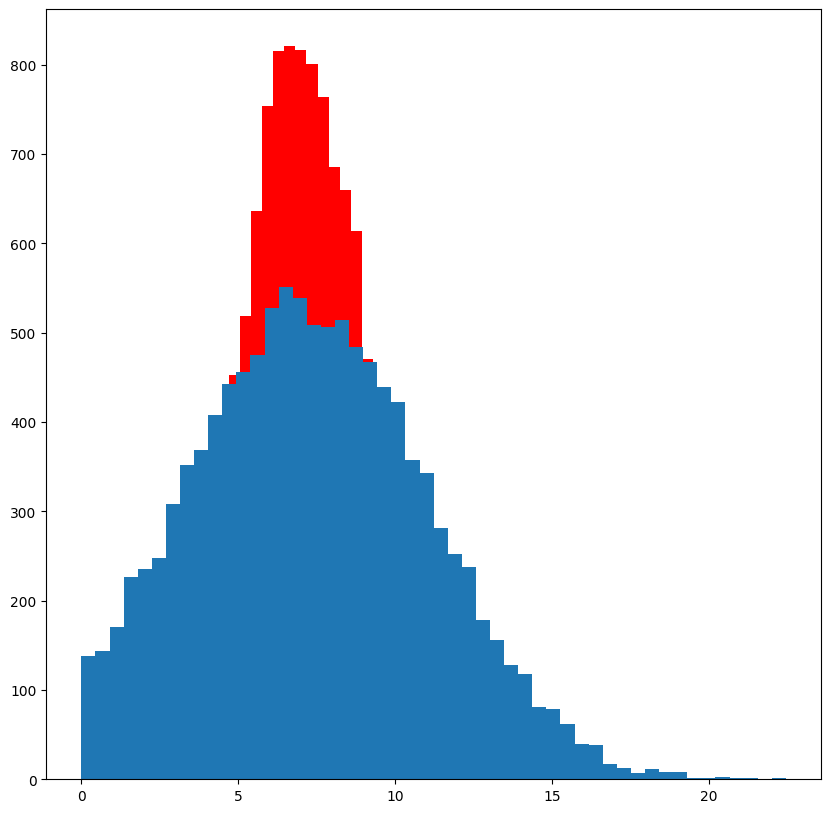

In [ ]:
plt.figure(figsize=(10, 10))
control_visit_all = data['av_site visit'][data['ab_group'] == 'A']
test_visit_all =data['av_site visit'][data['ab_group'] == 'B']


plt.hist(control_visit_all, color='r', bins=50)
plt.hist(test_visit_all,  bins=50)


plt.show()

In [ ]:
stats.ttest_ind(control_visit_all, test_visit_all, equal_var = False)

TtestResult(statistic=-10.957295422202266, pvalue=7.548128551839558e-28, df=17530.29639618072)

Видим, что дисперсии не равны

#Рассмотрим метрику "Доля юзеров с покупкой"

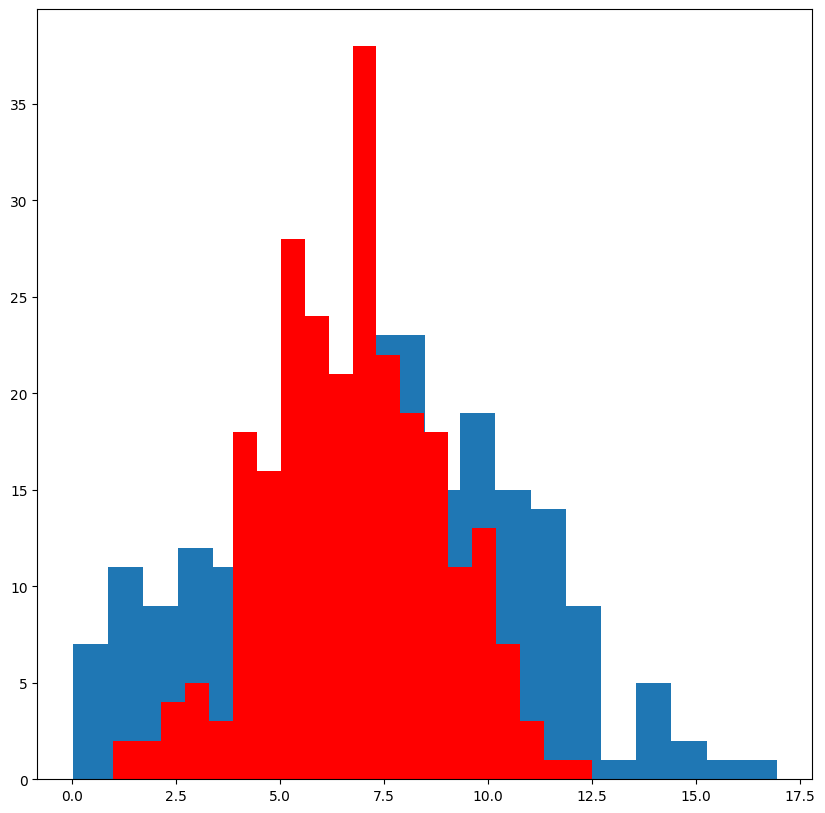

In [ ]:
plt.figure(figsize=(10, 10))
control_visit = data['av_site visit'][(data['ab_group'] == 'A')&(data['purchase'] == 1)]
test_visit =data['av_site visit'][(data['ab_group'] == 'B')&(data['purchase'] == 1)]
plt.hist(test_visit,  bins=20)
plt.hist(control_visit, color='r', bins=20)

plt.show()

In [ ]:
data['purchase'].value_counts()

0    22704
1      480
Name: purchase, dtype: int64

In [ ]:
k1 = data[data['ab_group']=='A']['purchase'].sum()
k2 = data[data['ab_group']=='B']['purchase'].sum()

In [ ]:
n1 = data[data['ab_group']=='A'].shape[0]
n2 = data[data['ab_group']=='B'].shape[0]

Проведем z-тест

In [ ]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]),
                                                   np.array([n1, n2]))
print('Results are ','z_score =%.3f, pvalue = %.3f'%(z_score, z_pvalue))

Results are  z_score =1.024, pvalue = 0.306


Различий нет, оставляем нулевую гипотезу

Проверим хи-квадратом

In [ ]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]),
                                                   np.array([n1, n2]))

print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =1.048, pvalue = 0.306


Различий нет, оставляем нулевую гипотезу

#Рассмотрим метрику "Среднее количество покупок на юзера"

In [ ]:
mw_stats = mannwhitneyu(x=data[data['ab_group'] == 'A']['num_purchases'].values,
                                                  y=data[data['ab_group'] == 'B']['num_purchases'].values)
mw_stats

MannwhitneyuResult(statistic=67287358.5, pvalue=0.3075297408628419)

Различий нет, оставляем нулевую гипотезу

# Рассмотрим метрику arpu


In [ ]:
data.groupby('ab_group')['revenue'].describe()

count      mean        std  min  25%  50%  75%          max
ab_group                                                               
A         11829.0  0.404667  13.136545  0.0  0.0  0.0  0.0  1303.609284
B         11355.0  0.245093   3.192299  0.0  0.0  0.0  0.0   113.830000

В группе А средняя выручка больше, чем в группе В

Применим критерий Манна-Уитни

In [ ]:
mw_stats = mannwhitneyu(x=data[(data['ab_group'] == 'A')&(data['purchase'] == 1)]['revenue'].values,
                                                  y=data[(data['ab_group'] == 'B')&(data['purchase'] == 1)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=28485.5, pvalue=0.902319344132039)

Видим, что статистически значимой разницы между группами нет.

Из всех проведенных тестов и оценки количественных данных можем рекомендовать оставить нулевую гипотезу